## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  76.741688  1166.253801  0.028598  5.193752  0.312523
1  79.980285   761.032274  0.475713  7.044543  1.433457
2   9.908220   570.491111  0.421809  9.706977  1.572748
3  56.630405   717.917969  0.180993  7.211444  1.065275
4  80.489463  1510.585380  0.865849  1.493824  1.558997


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9160929	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.9076077	total: 62.6ms	remaining: 31.2s
2:	learn: 0.8985297	total: 63.8ms	remaining: 21.2s
3:	learn: 0.8880344	total: 64.7ms	remaining: 16.1s
4:	learn: 0.8786204	total: 65.9ms	remaining: 13.1s
5:	learn: 0.8705390	total: 66.6ms	remaining: 11s
6:	learn: 0.8644952	total: 67.2ms	remaining: 9.54s
7:	learn: 0.8554379	total: 68.4ms	remaining: 8.48s
8:	learn: 0.8463055	total: 69.1ms	remaining: 7.61s
9:	learn: 0.8386417	total: 69.9ms	remaining: 6.92s
10:	learn: 0.8313628	total: 70.5ms	remaining: 6.33s
11:	learn: 0.8221149	total: 71ms	remaining: 5.85s
12:	learn: 0.8151502	total: 71.6ms	remaining: 5.44s
13:	learn: 0.8062583	total: 72ms	remaining: 5.07s
14:	learn: 0.7988199	total: 72.6ms	remaining: 4.76s
15:	learn: 0.7903046	total: 73.1ms	remaining: 4.49s
16:	learn: 0.7816643	total: 73.6ms	remaining: 4.26s
17:	learn: 0.7748788	total: 74.2ms	remaining: 4.04s
18:	learn: 0.7682224	total: 74.5ms	remaining: 3.85

47:	learn: 0.5993261	total: 90.2ms	remaining: 1.79s
48:	learn: 0.5938563	total: 90.7ms	remaining: 1.76s
49:	learn: 0.5900680	total: 91.2ms	remaining: 1.73s
50:	learn: 0.5861846	total: 91.5ms	remaining: 1.7s
51:	learn: 0.5813979	total: 92.1ms	remaining: 1.68s
52:	learn: 0.5759172	total: 92.6ms	remaining: 1.65s
53:	learn: 0.5709750	total: 92.9ms	remaining: 1.63s
54:	learn: 0.5653644	total: 93.4ms	remaining: 1.6s
55:	learn: 0.5615836	total: 93.9ms	remaining: 1.58s
56:	learn: 0.5565860	total: 94.4ms	remaining: 1.56s
57:	learn: 0.5515997	total: 94.9ms	remaining: 1.54s
58:	learn: 0.5475643	total: 95.4ms	remaining: 1.52s
59:	learn: 0.5430726	total: 95.9ms	remaining: 1.5s
60:	learn: 0.5381380	total: 96.4ms	remaining: 1.48s
61:	learn: 0.5335425	total: 96.9ms	remaining: 1.47s
62:	learn: 0.5291105	total: 97.4ms	remaining: 1.45s
63:	learn: 0.5252131	total: 97.9ms	remaining: 1.43s
64:	learn: 0.5210244	total: 98.4ms	remaining: 1.42s
65:	learn: 0.5168055	total: 98.8ms	remaining: 1.4s
66:	learn: 0.512

234:	learn: 0.2041368	total: 168ms	remaining: 548ms
235:	learn: 0.2030672	total: 169ms	remaining: 548ms
236:	learn: 0.2022201	total: 170ms	remaining: 546ms
237:	learn: 0.2010731	total: 170ms	remaining: 544ms
238:	learn: 0.2002215	total: 170ms	remaining: 543ms
239:	learn: 0.1992252	total: 171ms	remaining: 541ms
240:	learn: 0.1989495	total: 171ms	remaining: 540ms
241:	learn: 0.1978318	total: 172ms	remaining: 538ms
242:	learn: 0.1967839	total: 172ms	remaining: 536ms
243:	learn: 0.1958815	total: 173ms	remaining: 535ms
244:	learn: 0.1950543	total: 173ms	remaining: 533ms
245:	learn: 0.1939565	total: 173ms	remaining: 531ms
246:	learn: 0.1933907	total: 174ms	remaining: 529ms
247:	learn: 0.1930875	total: 174ms	remaining: 528ms
248:	learn: 0.1921640	total: 174ms	remaining: 526ms
249:	learn: 0.1912367	total: 175ms	remaining: 524ms
250:	learn: 0.1906398	total: 175ms	remaining: 523ms
251:	learn: 0.1900756	total: 176ms	remaining: 522ms
252:	learn: 0.1890886	total: 176ms	remaining: 520ms
253:	learn: 

437:	learn: 0.0985450	total: 250ms	remaining: 321ms
438:	learn: 0.0980931	total: 251ms	remaining: 320ms
439:	learn: 0.0976681	total: 251ms	remaining: 320ms
440:	learn: 0.0972395	total: 252ms	remaining: 319ms
441:	learn: 0.0967855	total: 252ms	remaining: 318ms
442:	learn: 0.0963726	total: 252ms	remaining: 317ms
443:	learn: 0.0961152	total: 253ms	remaining: 317ms
444:	learn: 0.0956981	total: 253ms	remaining: 316ms
445:	learn: 0.0952784	total: 254ms	remaining: 315ms
446:	learn: 0.0949558	total: 254ms	remaining: 314ms
447:	learn: 0.0945327	total: 254ms	remaining: 313ms
448:	learn: 0.0941275	total: 255ms	remaining: 313ms
449:	learn: 0.0937458	total: 255ms	remaining: 312ms
450:	learn: 0.0933740	total: 255ms	remaining: 311ms
451:	learn: 0.0929730	total: 256ms	remaining: 310ms
452:	learn: 0.0926109	total: 256ms	remaining: 309ms
453:	learn: 0.0922582	total: 257ms	remaining: 309ms
454:	learn: 0.0919147	total: 257ms	remaining: 308ms
455:	learn: 0.0916515	total: 257ms	remaining: 307ms
456:	learn: 

624:	learn: 0.0508331	total: 330ms	remaining: 198ms
625:	learn: 0.0506939	total: 331ms	remaining: 198ms
626:	learn: 0.0505036	total: 331ms	remaining: 197ms
627:	learn: 0.0503173	total: 332ms	remaining: 197ms
628:	learn: 0.0501434	total: 333ms	remaining: 196ms
629:	learn: 0.0499611	total: 333ms	remaining: 196ms
630:	learn: 0.0498290	total: 334ms	remaining: 195ms
631:	learn: 0.0496509	total: 335ms	remaining: 195ms
632:	learn: 0.0495575	total: 336ms	remaining: 195ms
633:	learn: 0.0493460	total: 336ms	remaining: 194ms
634:	learn: 0.0492155	total: 337ms	remaining: 194ms
635:	learn: 0.0490547	total: 337ms	remaining: 193ms
636:	learn: 0.0489280	total: 338ms	remaining: 193ms
637:	learn: 0.0487705	total: 339ms	remaining: 192ms
638:	learn: 0.0486685	total: 339ms	remaining: 192ms
639:	learn: 0.0485003	total: 340ms	remaining: 191ms
640:	learn: 0.0482981	total: 341ms	remaining: 191ms
641:	learn: 0.0481737	total: 341ms	remaining: 190ms
642:	learn: 0.0480220	total: 342ms	remaining: 190ms
643:	learn: 

807:	learn: 0.0287953	total: 413ms	remaining: 98ms
808:	learn: 0.0287029	total: 414ms	remaining: 97.7ms
809:	learn: 0.0286093	total: 414ms	remaining: 97.1ms
810:	learn: 0.0285519	total: 415ms	remaining: 96.6ms
811:	learn: 0.0284657	total: 415ms	remaining: 96.1ms
812:	learn: 0.0284091	total: 415ms	remaining: 95.6ms
813:	learn: 0.0283244	total: 416ms	remaining: 95ms
814:	learn: 0.0282687	total: 416ms	remaining: 94.5ms
815:	learn: 0.0281799	total: 417ms	remaining: 94ms
816:	learn: 0.0280615	total: 417ms	remaining: 93.4ms
817:	learn: 0.0280068	total: 418ms	remaining: 92.9ms
818:	learn: 0.0279250	total: 418ms	remaining: 92.4ms
819:	learn: 0.0278710	total: 418ms	remaining: 91.9ms
820:	learn: 0.0277477	total: 419ms	remaining: 91.3ms
821:	learn: 0.0276946	total: 419ms	remaining: 90.8ms
822:	learn: 0.0276145	total: 420ms	remaining: 90.3ms
823:	learn: 0.0275622	total: 420ms	remaining: 89.7ms
824:	learn: 0.0274491	total: 421ms	remaining: 89.2ms
825:	learn: 0.0273291	total: 421ms	remaining: 88.7ms

999:	learn: 0.0168029	total: 492ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4510846706117988


ABC Pre-generator MAE 0.4516831264694415


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

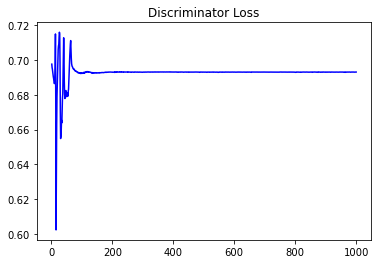

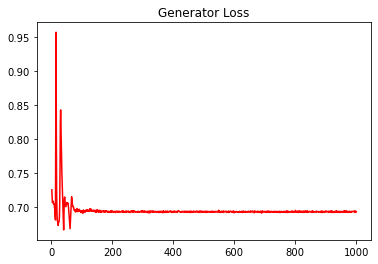

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4393992811832577


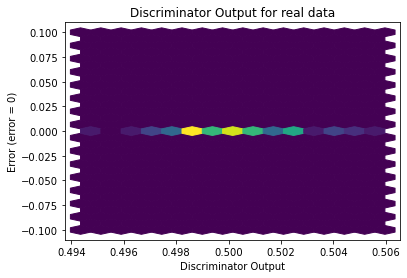

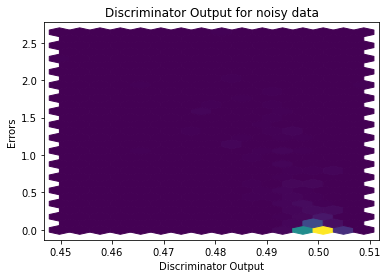

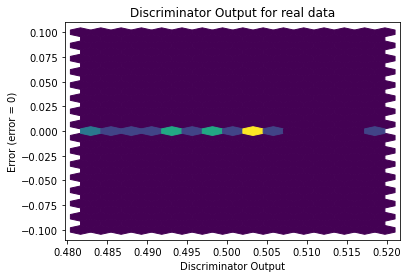

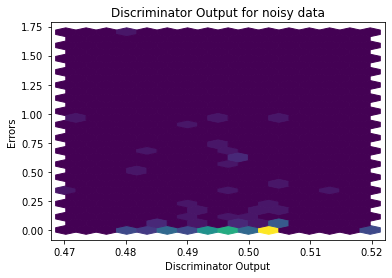

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

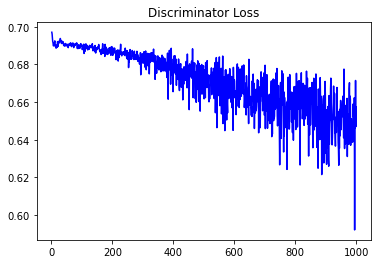

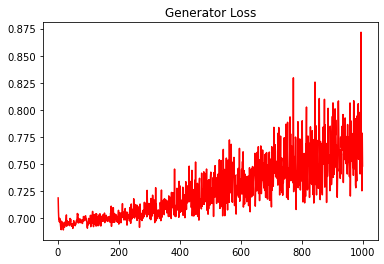

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.48339487829431893


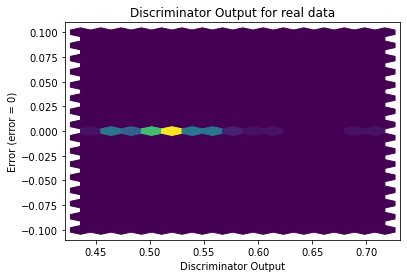

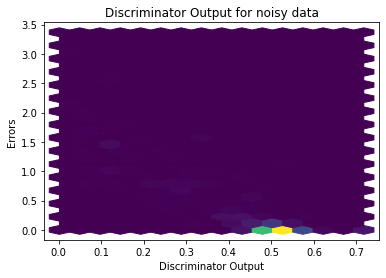

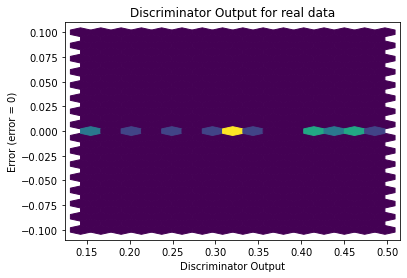

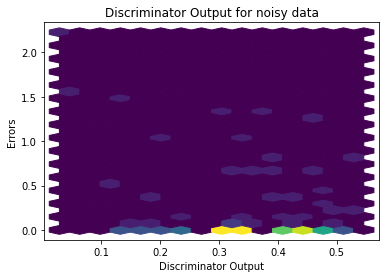

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


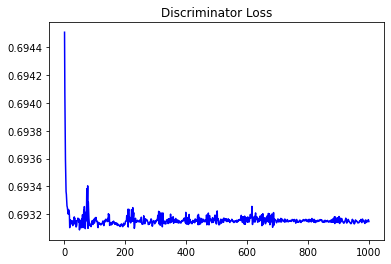

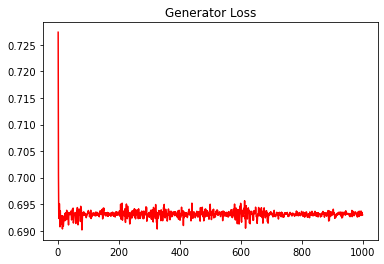

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4558355519399047


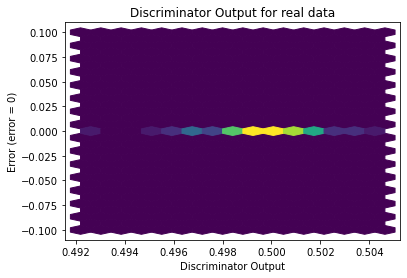

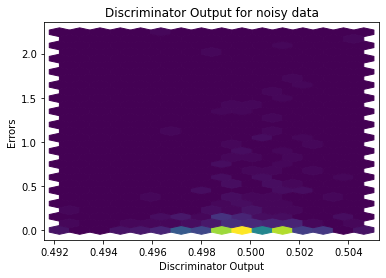

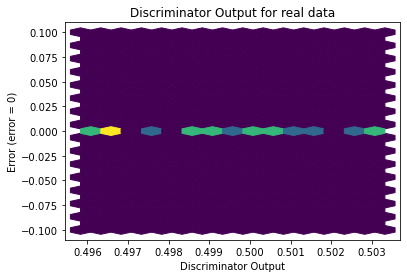

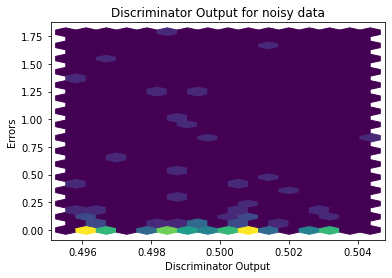

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


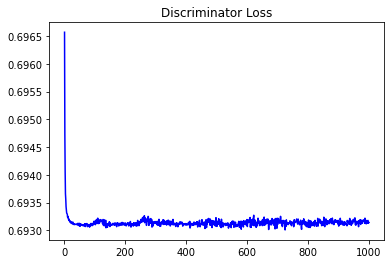

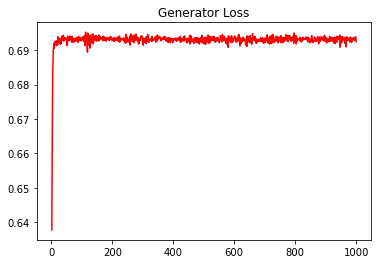

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.46261096685240044


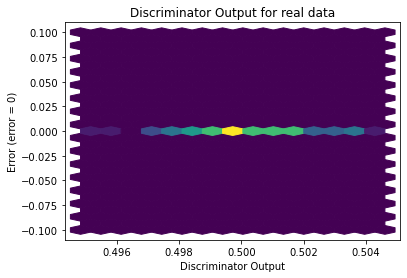

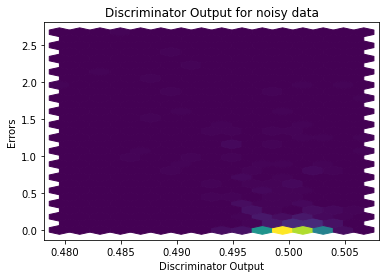

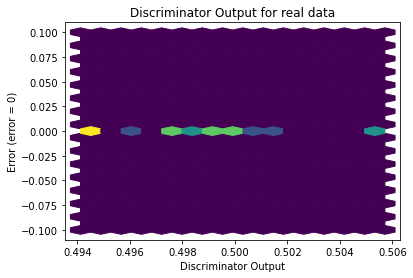

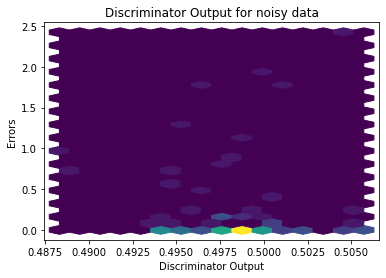

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0228]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0298]], requires_grad=True)
